# Unit 5 - Financial Planning


In [100]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [49]:
# Set current amount of crypto assets
my_btc = 1.3
my_eth = 5.3

In [50]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [51]:
sample_list=[1, 2, 3, 4]
sum_of_list=sum(sample_list)
sum_of_list

10

In [61]:
# Fetch current BTC price
# YOUR CODE HERE!
current_btc = requests.get(btc_url)
my_current_btc = current_btc.json()
today_btc = my_current_btc['data']['1']['quotes']['USD']['price']
today_btc

38547.0

In [71]:
# Fetch current ETH price
# YOUR CODE HERE!
current_eth = requests.get(eth_url)
my_current_eth = current_eth.json()
my_current_eth

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 115943577,
   'total_supply': 115943577,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2622.92,
     'volume_24h': 121148337142,
     'market_cap': 307054781944,
     'percentage_change_1h': -1.68236235300653,
     'percentage_change_24h': -21.9198064485239,
     'percentage_change_7d': -37.2925551508793,
     'percent_change_1h': -1.68236235300653,
     'percent_change_24h': -21.9198064485239,
     'percent_change_7d': -37.2925551508793},
    'CAD': {'price': 3183.962588,
     'volume_24h': 147061966456.674,
     'market_cap': 372733799801.822,
     'percent_change_1h': -1.68236235300653,
     'percent_change_24h': -21.9198064485239,
     'percent_change_7d': -37.2925551508793}},
   'last_updated': 1621466360}},
 'metadata': {'timestamp': 1621466360,
  'num_cryptocurrencies': 1300,
  'error': None}}

In [73]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * today_btc
my_eth_value = my_eth * today_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.3 BTC is $50111.10
The current value of your 5.3 ETH is $13901.48


In [74]:
# Current amount of shares
# YOUR CODE HERE!
my_spy = 50
my_agg = 200

In [80]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = "PKENV2D84KZBWTB61A06"
alpaca_api_secret_key = "42dmsdKjQoLdPLOYFCJcR4TaGUq8AUEcByGTx504"

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca_api = tradeapi.REST(
        alpaca_api_key,
        alpaca_api_secret_key,
        api_version = "v2"
)

In [87]:
# Format current date as ISO format
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_spy_agg = alpaca_api.get_barset(
    tickers,
    timeframe, 
    start='2021-05-19',
    end='2021-05-19'
).df

# Preview DataFrame
# YOUR CODE HERE!
df_spy_agg

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2020-12-24 00:00:00-05:00  117.94  118.0460  117.9250  118.010  1722930   
2020-12-28 00:00:00-05:00  117.97  118.0450  117.8330  118.010  3503095   
2020-12-29 00:00:00-05:00  118.06  118.0600  117.9200  118.050  3255442   
2020-12-30 00:00:00-05:00  118.09  118.1200  117.9815  118.100  2593714   
2020-12-31 00:00:00-05:00  118.18  118.2400  118.1200  118.200  4325026   
...                           ...       ...       ...      ...      ...   
2021-05-13 00:00:00-04:00  113.90  114.0600  113.7800  114.015  5446892   
2021-05-14 00:00:00-04:00  114.22  114.2800  114.1219  114.280  3711363   
2021-05-17 00:00:00-04:00  114.21  115.4999  111.2600  114.165  3852318   
2021-05-18 00:00:00-04:00  114.11  114.1100  114.0300  114.070  3499293   
2021-05-19 00:00:00-04:00  114.62  114.6200  113.7900  113.920  6576312   

                              SPY                                       
                             open    high      low     close    volume  
time                                                                    
2020-12-24 00:00:00-05:00  368.08  369.01  367.450  368.9899  21047937  
2020-12-28 00:00:00-05:00  371.74  372.59  371.070  372.1400  31589494  
2020-12-29 00:00:00-05:00  373.81  374.00  370.830  371.4800  45214280  
2020-12-30 00:00:00-05:00  372.34  373.10  371.570  371.9300  40295732  
2020-12-31 00:00:00-05:00  371.78  374.66  371.232  373.8500  52720911  
...                           ...     ...      ...       ...       ...  
2021-05-13 00:00:00-04:00  407.07  412.35  407.020  410.2600  96561623  
2021-05-14 00:00:00-04:00  413.20  417.49  413.180  416.5300  69029028  
2021-05-17 00:00:00-04:00  415.39  416.39  413.360  415.5400  57713982  
2021-05-18 00:00:00-04:00  415.80  416.06  411.770  412.0000  52337849  
2021-05-19 00:00:00-04:00  406.92  411.05  405.335  410.9000  94167279  

[100 rows x 10 columns]

In [88]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = 113.92
spy_close_price = 410.90

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.92
Current SPY closing price: $410.9


In [90]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20545.00
The current value of your 200 AGG shares is $22784.00


### Savings Health Analysis

In [92]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
total_shares = my_agg_value + my_spy_value
total_crypto = my_eth_value + my_btc_value
df_savings = total_shares + total_crypto

# Display savings DataFrame
display(df_savings)

107341.576

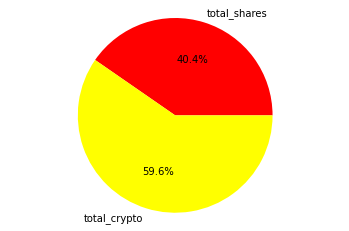

In [101]:
# Plot savings pie chart
# YOUR CODE HERE!
labels = 'total_shares', 'total_crypto'
sizes = [total_shares, total_crypto]
colors =['red', 'yellow']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [107]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
savings_total = df_savings

# Validate saving health
# YOUR CODE HERE!
if emergency_fund < savings_total:
    print("Congratulations you have enough money in your emergency fund")
if emergency_fund == savings_total:
    print("Congratulationsh you have enought money in your emergenvy fund")
if emergency_fund > savings_total:
    print(f"You need {emergency_savings - savings_total} more in savings")

Congratulations you have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [108]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [110]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca_api.get_barset(
    tickers,
    timeframe, 
    start='2021-05-19',
    end='2021-05-19'
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-12-24 00:00:00-05:00  117.94  118.046  117.9250  118.01  1722930  368.08   
2020-12-28 00:00:00-05:00  117.97  118.045  117.8330  118.01  3503095  371.74   
2020-12-29 00:00:00-05:00  118.06  118.060  117.9200  118.05  3255442  373.81   
2020-12-30 00:00:00-05:00  118.09  118.120  117.9815  118.10  2593714  372.34   
2020-12-31 00:00:00-05:00  118.18  118.240  118.1200  118.20  4325026  371.78   

                                                                
                             high      low     close    volume  
time                                                            
2020-12-24 00:00:00-05:00  369.01  367.450  368.9899  21047937  
2020-12-28 00:00:00-05:00  372.59  371.070  372.1400  31589494  
2020-12-29 00:00:00-05:00  374.00  370.830  371.4800  45214280  
2020-12-30 00:00:00-05:00  373.10  371.570  371.9300  40295732  
2020-12-31 00:00:00-05:00  374.66  371.232  373.8500  52720911

In [114]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_30yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [115]:
# Printing the simulation input data
# YOUR CODE HERE!
mc_30yr.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-12-24 00:00:00-05:00  117.94  118.046  117.9250  118.01  1722930   
2020-12-28 00:00:00-05:00  117.97  118.045  117.8330  118.01  3503095   
2020-12-29 00:00:00-05:00  118.06  118.060  117.9200  118.05  3255442   
2020-12-30 00:00:00-05:00  118.09  118.120  117.9815  118.10  2593714   
2020-12-31 00:00:00-05:00  118.18  118.240  118.1200  118.20  4325026   

                                           SPY                             \
                          daily_return    open    high      low     close   
time                                                                        
2020-12-24 00:00:00-05:00          NaN  368.08  369.01  367.450  368.9899   
2020-12-28 00:00:00-05:00     0.000000  371.74  372.59  371.070  372.1400   
2020-12-29 00:00:00-05:00     0.000339  373.81  374.00  370.830  371.4800   
2020-12-30 00:00:00-05:00     0.000424  372.34  373.10  371.570  371.9300   
2020-12-31 00:00:00-05:00     0.000847  371.78  374.66  371.232  373.8500   

                                                  
                             volume daily_return  
time                                              
2020-12-24 00:00:00-05:00  21047937          NaN  
2020-12-28 00:00:00-05:00  31589494     0.008537  
2020-12-29 00:00:00-05:00  45214280    -0.001774  
2020-12-30 00:00:00-05:00  40295732     0.001211  
2020-12-31 00:00:00-05:00  52720911     0.005162

In [116]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000862,0.997990,0.995368,1.006536,1.001545,0.992720,1.002089,0.998928,1.000643,1.002379,...,1.003804,1.003295,1.005426,1.003305,0.990036,1.004370,0.996737,1.004032,1.009981,1.001913
2,1.004199,1.003919,0.998384,1.002359,0.993901,0.993733,1.004755,1.004592,0.995421,1.008624,...,1.000623,0.999808,1.002804,1.006735,0.986605,1.017003,0.997722,1.004128,1.005992,1.002235
3,0.995747,1.011953,0.994528,1.012373,0.986572,0.997805,1.005205,1.006167,1.003788,1.006224,...,0.992365,0.997750,1.007538,1.003147,0.972833,1.010045,0.993697,1.002530,0.999240,0.994722
4,0.992478,1.018850,1.000624,1.019416,0.985399,0.995287,0.998169,1.008649,1.007464,1.008425,...,0.996903,0.989154,1.004087,0.999486,0.966688,1.012206,0.995844,1.010092,0.996444,0.998874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,65.372790,44.511802,67.375925,44.066792,46.708574,24.158942,52.663638,58.609642,64.791886,99.745355,...,39.480068,34.830185,45.343434,68.834459,92.383444,100.876030,84.839145,38.157586,69.564610,37.188524
7557,65.174458,44.864180,67.580492,43.966093,46.580000,24.228347,52.597185,58.545553,64.303946,99.790034,...,39.485239,34.797351,45.369485,68.725928,92.994636,100.339805,84.550358,38.332885,69.989574,37.199478
7558,65.201813,44.491049,66.918800,44.105174,46.592951,24.288407,52.543193,58.789606,64.654213,99.802197,...,39.446397,34.694455,45.303945,68.804647,92.682634,100.677269,84.574678,38.369211,70.132248,37.162803
7559,65.117802,44.701155,67.141946,44.380765,47.250228,24.244540,52.672154,58.484004,64.591728,100.799593,...,39.269266,34.867844,45.443600,68.915580,91.930364,99.759595,85.122472,38.347311,69.696013,37.106443


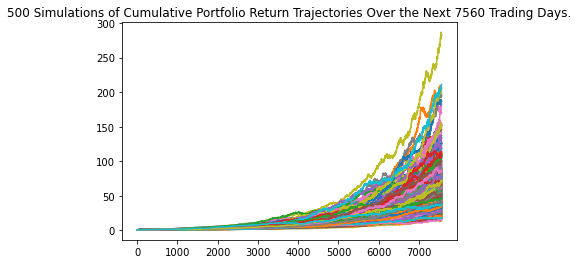

In [117]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = mc_30yr.plot_simulation()

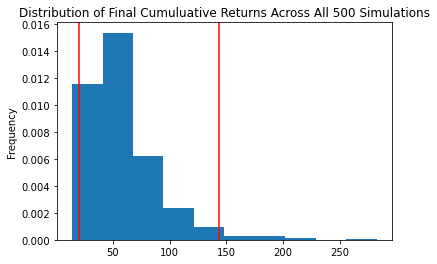

In [118]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution_plot = mc_30yr.plot_distribution()

### Retirement Analysis

In [119]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary = mc_30yr.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary)

count           500.000000
mean             58.622361
std              32.759881
min              13.989086
25%              37.728682
50%              50.241554
75%              69.366414
max             282.673489
95% CI Lower     20.125577
95% CI Upper    143.614019
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [120]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary[8]*20000,2)
ci_upper = round(summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $402511.53 and $2872280.39


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [123]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $603767.3 and $4308420.58


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [124]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
mc_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [125]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
mc_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999800,1.006656,1.002699,1.001692,0.999112,0.994777,1.000759,1.011036,1.003581,0.995370,...,1.011455,0.987954,1.006428,0.994989,0.989246,0.992887,0.998381,0.985140,0.996342,1.001011
2,1.002905,1.002665,0.991627,0.996672,1.003413,0.992827,1.001734,1.019395,0.995546,0.996103,...,1.011262,0.975485,1.013717,0.987071,0.995664,0.995106,1.000059,0.989749,0.993299,1.000733
3,1.008966,0.997990,0.998920,0.999229,1.008790,1.001470,1.002642,1.022151,0.999241,0.991088,...,1.012246,0.979584,1.002670,0.988307,0.998053,0.990645,1.009045,0.981557,1.008341,0.998120
4,1.007391,1.008171,1.005372,1.005339,1.009206,1.012271,1.010778,1.022038,0.997276,0.981952,...,1.014476,0.964505,1.002931,0.987420,0.999722,0.993392,1.011559,0.976789,1.012618,0.993835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.538155,2.104556,1.675173,2.028303,1.663996,1.395686,1.489483,2.065469,2.577375,2.203308,...,2.017473,2.917900,1.639242,1.573008,2.370581,3.032305,2.424850,1.757285,1.911392,1.347943
1257,1.538897,2.099744,1.677136,2.038751,1.674071,1.389388,1.495276,2.072080,2.584600,2.195510,...,2.010530,2.928502,1.626311,1.574561,2.388011,3.024076,2.435810,1.772527,1.918352,1.352139
1258,1.541277,2.095435,1.666768,2.043123,1.667373,1.378035,1.498393,2.075648,2.567867,2.210525,...,2.008415,2.908223,1.619963,1.584904,2.381896,3.051116,2.454040,1.771623,1.927889,1.352089
1259,1.549534,2.111137,1.649198,2.053384,1.655998,1.380134,1.509427,2.087163,2.584519,2.210038,...,2.022258,2.932142,1.604359,1.597425,2.390883,3.063250,2.446363,1.775637,1.928434,1.363412


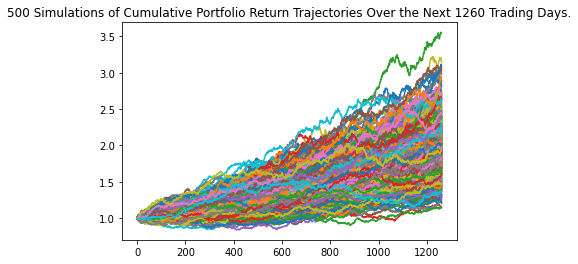

In [127]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = mc_5yr.plot_simulation()

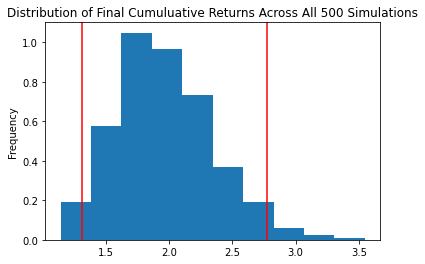

In [128]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution_plot = mc_5yr.plot_distribution()

In [129]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary = mc_5yr.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary)

count           500.000000
mean              1.962262
std               0.382924
min               1.143424
25%               1.686178
50%               1.916394
75%               2.211021
max               3.546541
95% CI Lower      1.313237
95% CI Upper      2.772500
Name: 1260, dtype: float64


In [130]:
# Set initial investment
# YOUR CODE HERE!
inital_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(summary[8]*initial_investment,2)
ci_upper_five = round(summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $39397.12 and $83175.0


### Ten Years Retirement Option

In [132]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [133]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997064,0.992677,1.004839,1.007780,1.002263,1.007611,0.998966,0.997767,1.001155,0.990265,...,1.002817,1.004904,1.005314,1.003820,0.993395,1.001523,0.999722,1.001685,1.001884,0.991830
2,1.004724,0.990114,1.006704,1.007206,1.002706,1.018591,1.000248,1.000814,1.006141,0.995007,...,1.007863,1.006335,1.000677,1.002335,0.988849,0.998693,0.999821,1.004726,1.001088,0.982356
3,1.003463,0.998697,1.011256,1.014032,0.994516,1.013072,0.998078,1.003319,1.006225,0.996705,...,1.020956,1.008922,1.002063,1.004179,0.985692,0.991914,1.002318,0.999963,0.988998,0.992465
4,1.000171,0.994098,1.011999,1.005331,0.993308,1.017368,0.993011,0.995234,1.008574,0.992186,...,1.011450,1.014411,1.003424,1.007627,0.981854,0.991612,1.010850,0.996131,0.993176,0.986897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.836790,1.595542,2.338405,2.360470,1.817782,1.398547,1.474055,1.600720,1.874461,2.000687,...,2.545973,2.103386,2.176759,1.613061,2.037875,2.279970,1.794448,1.995512,1.824135,2.019316
1257,1.844748,1.593491,2.339071,2.362751,1.818785,1.394687,1.478589,1.587857,1.887626,2.022656,...,2.561789,2.096876,2.179498,1.604459,2.039002,2.296510,1.804129,1.998238,1.809628,2.032800
1258,1.828533,1.589915,2.344834,2.353940,1.827076,1.407614,1.475256,1.568450,1.904903,2.024331,...,2.561432,2.109337,2.162335,1.603439,2.036685,2.306837,1.823726,1.998260,1.823716,2.043993
1259,1.827095,1.591343,2.339582,2.358449,1.828914,1.400845,1.483928,1.576329,1.886866,2.032819,...,2.579985,2.109332,2.160829,1.594706,2.036196,2.308868,1.828440,2.014048,1.815313,2.047999


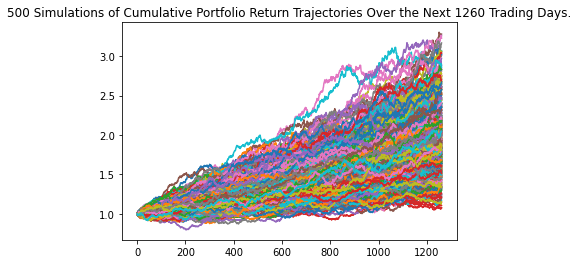

In [134]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = mc_10yr.plot_simulation()

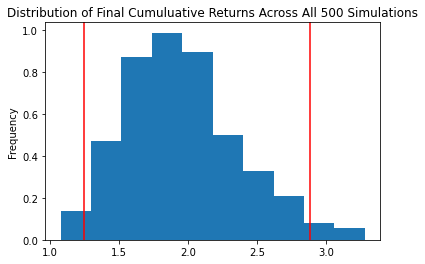

In [135]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution_plot = mc_10yr.plot_distribution()

In [136]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary = mc_10yr.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary)

count           500.000000
mean              1.955347
std               0.417071
min               1.075044
25%               1.655631
50%               1.908769
75%               2.182243
max               3.278784
95% CI Lower      1.247278
95% CI Upper      2.880264
Name: 1260, dtype: float64


In [137]:
# Set initial investment
# YOUR CODE HERE!
inital_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(summary[8]*initial_investment,2)
ci_upper_ten = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $37418.33 and $86407.93
